# Forecasting Superstore Sales
# Kelompok 5 Metode Peramalan

Sumber data :
https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting

## Pendahuluan

### Install Package dan Import Library

In [ ]:
#Khusus jalanin buat di collab aja ya kalo di rstudio gitu ga usah
system("gdown --id 1-2i-8FzZ0bMNhc1CpBvMn-oDnlIPcuZN")

untar(tarfile = "library.tar.gz")

.libPaths('usr/local/lib/R/site-library/')

.libPaths()

[1] "/content/usr/local/lib/R/site-library"
[2] "/usr/local/lib/R/site-library"        
[3] "/usr/lib/R/site-library"              
[4] "/usr/lib/R/library"

In [ ]:
packages <- c("TSA","forecast","tseries","normtest","dplyr","zoo","writexl")
if ( length(missing_pkgs <- setdiff(packages, rownames(installed.packages()))) > 0) {
  message("Installing missing package(s): ", paste(missing_pkgs, collapse = ", "))
  install.packages(missing_pkgs)
}
lapply(packages, library, character.only = TRUE)

[[1]]
 [1] "writexl"   "zoo"       "dplyr"     "normtest"  "tseries"   "forecast" 
 [7] "TSA"       "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[13] "methods"   "base"     

[[2]]
 [1] "writexl"   "zoo"       "dplyr"     "normtest"  "tseries"   "forecast" 
 [7] "TSA"       "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[13] "methods"   "base"     

[[3]]
 [1] "writexl"   "zoo"       "dplyr"     "normtest"  "tseries"   "forecast" 
 [7] "TSA"       "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[13] "methods"   "base"     

[[4]]
 [1] "writexl"   "zoo"       "dplyr"     "normtest"  "tseries"   "forecast" 
 [7] "TSA"       "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[13] "methods"   "base"     

[[5]]
 [1] "writexl"   "zoo"       "dplyr"     "normtest"  "tseries"   "forecast" 
 [7] "TSA"       "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[13] "methods"   "base"     

[[6]]
 [1] "writexl"   "zoo"       "dplyr"     "normtest"  "tseries"   "forecast" 
 [7] "TSA"       "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[13] "methods"   "base"     

[[7]]
 [1] "writexl"   "zoo"       "dplyr"     "normtest"  "tseries"   "forecast" 
 [7] "TSA"       "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[13] "methods"   "base"

### Import Data

In [ ]:
id <- "1ACZP4o4fKvVpYFwvlwx9wIZJN0NHrhOT" # google file ID
data <- read.csv(sprintf("https://docs.google.com/uc?id=%s&export=download", id))
head(data)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Country,City,State,Postal.Code,Region,Product.ID,Category,Sub.Category,Product.Name,Sales
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400
3,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200
4,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
6,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,"Eldon Expressions Wood and Plastic Desk Accessories, Cherry Wood",48.8600


In [ ]:
str(data)

'data.frame':	9800 obs. of  18 variables:
 $ Row.ID       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Order.ID     : chr  "CA-2017-152156" "CA-2017-152156" "CA-2017-138688" "US-2016-108966" ...
 $ Order.Date   : chr  "08/11/2017" "08/11/2017" "12/06/2017" "11/10/2016" ...
 $ Ship.Date    : chr  "11/11/2017" "11/11/2017" "16/06/2017" "18/10/2016" ...
 $ Ship.Mode    : chr  "Second Class" "Second Class" "Second Class" "Standard Class" ...
 $ Customer.ID  : chr  "CG-12520" "CG-12520" "DV-13045" "SO-20335" ...
 $ Customer.Name: chr  "Claire Gute" "Claire Gute" "Darrin Van Huff" "Sean O'Donnell" ...
 $ Segment      : chr  "Consumer" "Consumer" "Corporate" "Consumer" ...
 $ Country      : chr  "United States" "United States" "United States" "United States" ...
 $ City         : chr  "Henderson" "Henderson" "Los Angeles" "Fort Lauderdale" ...
 $ State        : chr  "Kentucky" "Kentucky" "California" "Florida" ...
 $ Postal.Code  : int  42420 42420 90036 33311 33311 90032 90032 90032 90032 90032 ...
 $

In [ ]:
dim(data)

[1] 9800   18

### Preprocessing Data

In [ ]:
#mengubah kolom Order.Date menjadi tipe datetime
data[['Order.Date']] <- as.POSIXct(data[['Order.Date']],
                                   format = "%d/%m/%Y")

In [ ]:
#format tanggal nya jadi tahun-bulan-hari ya gais
#drop semua kolom kecuali Order.Date dan Sales
databaru <- subset(data, select = c("Order.Date", "Sales"))
head(databaru)

,Order.Date,Sales
,<dttm>,<dbl>
1,2017-11-08,261.9600
2,2017-11-08,731.9400
3,2017-06-12,14.6200
4,2016-10-11,957.5775
5,2016-10-11,22.3680
6,2015-06-09,48.8600


In [ ]:
#memeriksa jumlah missing value
sum(is.na(databaru))

[1] 0

In [ ]:
#Groupby bulan dan tahun berdasarkan jumlah sales
data2 <- databaru %>% mutate(month = format(Order.Date, "%m"), year = format(Order.Date, "%Y")) %>% group_by(month, year) %>% summarise(total = sum(Sales))
data2$Date <- as.yearmon(paste(data2$year, data2$month), "%Y %m")
head(data2)

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


month,year,total,Date
<chr>,<chr>,<dbl>,<yearmon>
01,2015,14205.707,Jan 2015
01,2016,18066.958,Jan 2016
01,2017,18542.491,Jan 2017
01,2018,43476.474,Jan 2018
02,2015,4519.892,Feb 2015
02,2016,11951.411,Feb 2016


In [ ]:
#Mengurutkan dan Mengganti Nama Kolom
data3 <- subset(data2, select = c("Date", "total"))
data3 <- rename(data3, Total_Sales=total)
data4 <- data3[order(data3$Date),]
head(data4)
tail(data4)

Date,Total_Sales
<yearmon>,<dbl>
Jan 2015,14205.707
Feb 2015,4519.892
Mar 2015,55205.797
Apr 2015,27906.855
May 2015,23644.303
Jun 2015,34322.936


Date,Total_Sales
<yearmon>,<dbl>
Jul 2018,44825.10
Aug 2018,62837.85
Sep 2018,86152.89
Oct 2018,77448.13
Nov 2018,117938.15
Dec 2018,83030.39


In [ ]:
datats <- ts(data4$Total_Sales, start=2015, frequency=12)
datats

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2015,14205.707,4519.892,55205.797,27906.855,23644.303,34322.936,33781.543,27117.536,81623.527,31453.393,77907.661,68167.058
2016,18066.958,11951.411,32339.318,34154.469,29959.531,23599.374,28608.259,36818.342,63133.606,31011.737,75249.399,74543.601
2017,18542.491,22978.815,51165.059,38679.767,56656.908,39724.486,38320.783,30542.200,69193.391,59583.033,79066.496,95739.121
2018,43476.474,19920.997,58863.413,35541.910,43825.982,48190.728,44825.104,62837.848,86152.888,77448.131,117938.155,83030.389


In [ ]:
str(datats)

 Time-Series [1:48] from 2015 to 2019: 14206 4520 55206 27907 23644 ...


## Uji Stationer

### Uji Berdasarkan Plot (Subejktif)

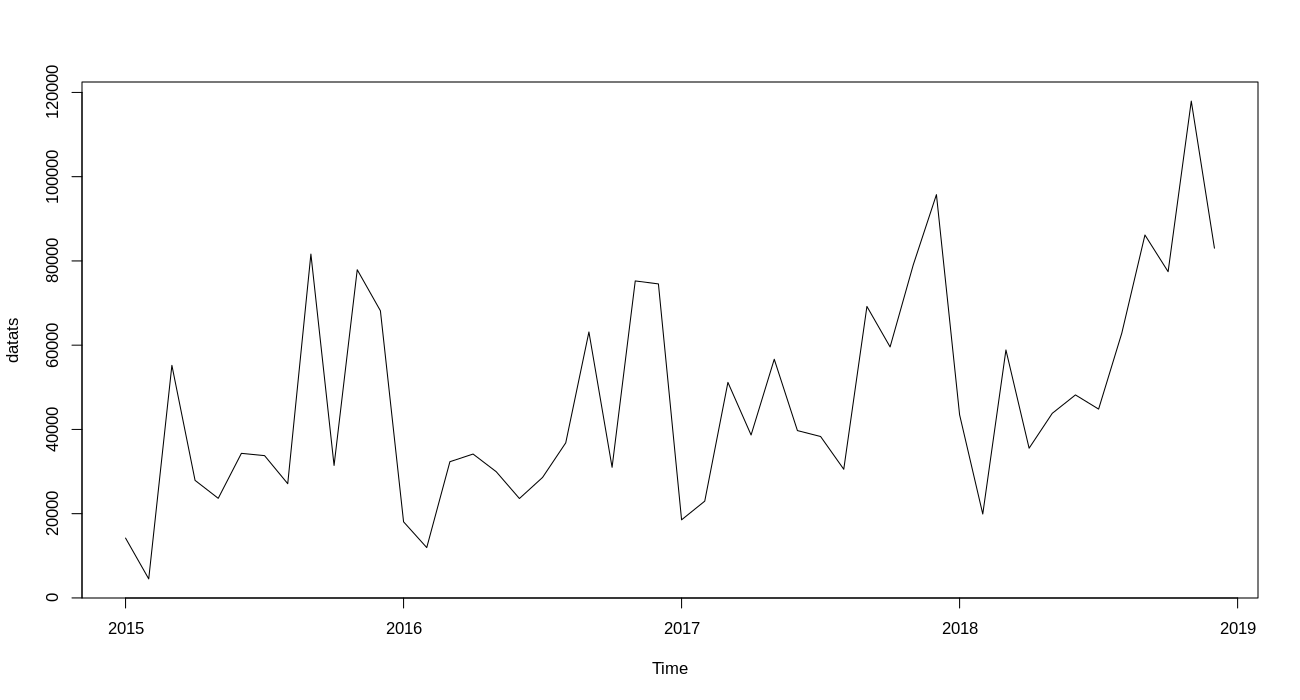

In [ ]:
options(repr.plot.width = 13, repr.plot.height = 7, repr.plot.res = 100)
plot(datats)

### Uji Box Pierce

H0 : Datanya Stationer

In [ ]:
Box.test(datats, lag = length(data4$Total_Sales)-1)


	Box-Pierce test

data:  datats
X-squared = 54.578, df = 47, p-value = 0.2086


Karena p-value > 0.05 artinya H0 tidak ditolak,

maka datanya stationer (ini jujur aneh, gausah dimasukin dah wkwk)

### Uji Ljung Box

H0 : Datanya Stationer

In [ ]:
Box.test(datats, lag = length(data4$Total_Sales)-1, type="Ljung")


	Box-Ljung test

data:  datats
X-squared = 152.27, df = 47, p-value = 4.899e-13


Karena p-value < 0.05 artinya H0 ditolak

maka datanya tidak stationer

### ADF

H0 : Datanya tidak stationer

In [ ]:
adf.test(datats)


	Augmented Dickey-Fuller Test

data:  datats
Dickey-Fuller = -3.3858, Lag order = 3, p-value = 0.06943
alternative hypothesis: stationary


Karena p-value > 0.05 artinya H0 tidak ditolak,

maka artinya datanya tidak stationer

### Differencing

In [ ]:
diffdata <- diff(datats, differences=1)
diffdata

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2015,,-9685.8150,50685.9050,-27298.9420,-4262.5520,10678.6326,-541.3926,-6664.0065,54505.9903,-50170.1338,46454.2677,-9740.6022
2016,-50100.1009,-6115.5466,20387.9074,1815.1501,-4194.9380,-6360.1565,5008.8850,8210.0832,26315.2638,-32121.8685,44237.6620,-705.7983
2017,-56001.1102,4436.3240,28186.2440,-12485.2920,17977.1410,-16932.4220,-1403.7030,-7778.5827,38651.1906,-9610.3579,19483.4628,16672.6252
2018,-52262.6470,-23555.4766,38942.4154,-23321.5027,8284.0721,4364.7455,-3365.6237,18012.7440,23315.0400,-8704.7568,40490.0238,-34907.7662


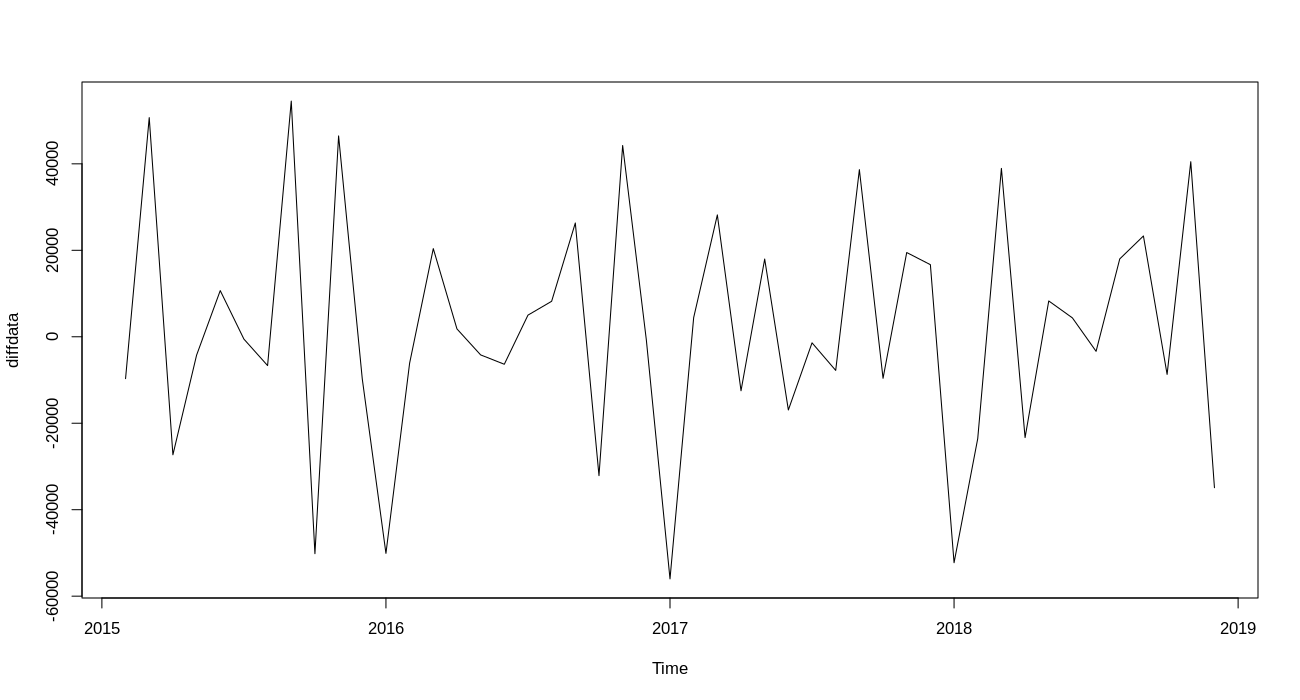

In [ ]:
options(repr.plot.width = 13, repr.plot.height = 7, repr.plot.res = 100)
plot(diffdata)

In [ ]:
Box.test(diffdata, lag = length(diffdata)-1)


	Box-Pierce test

data:  diffdata
X-squared = 62.204, df = 46, p-value = 0.05573


In [ ]:
Box.test(diffdata, lag = length(diffdata)-1, type="Ljung")


	Box-Ljung test

data:  diffdata
X-squared = 124.77, df = 46, p-value = 3.397e-09


In [ ]:
adf.test(diffdata)

Warning message in adf.test(diffdata):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diffdata
Dickey-Fuller = -4.2286, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary


## Spesifikasi Model

In [ ]:
#Adjust Plot Margin (di R(?))
par(mar = c(1, 1, 1, 1))

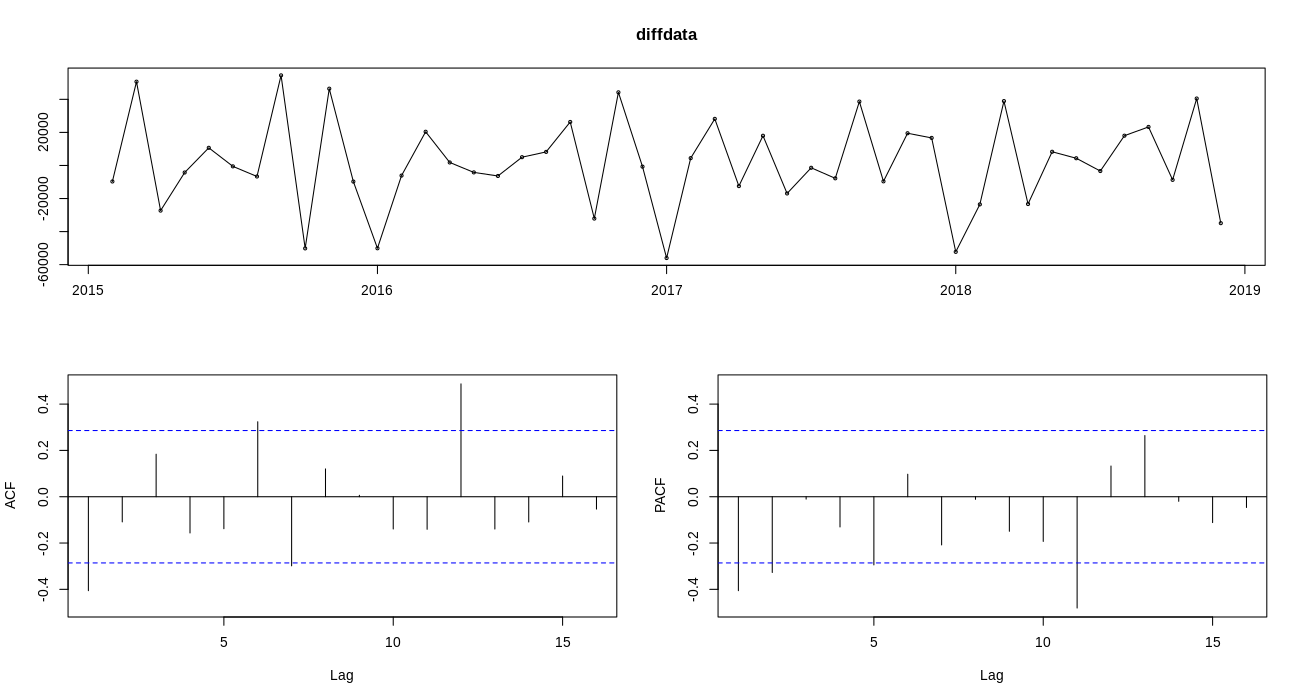

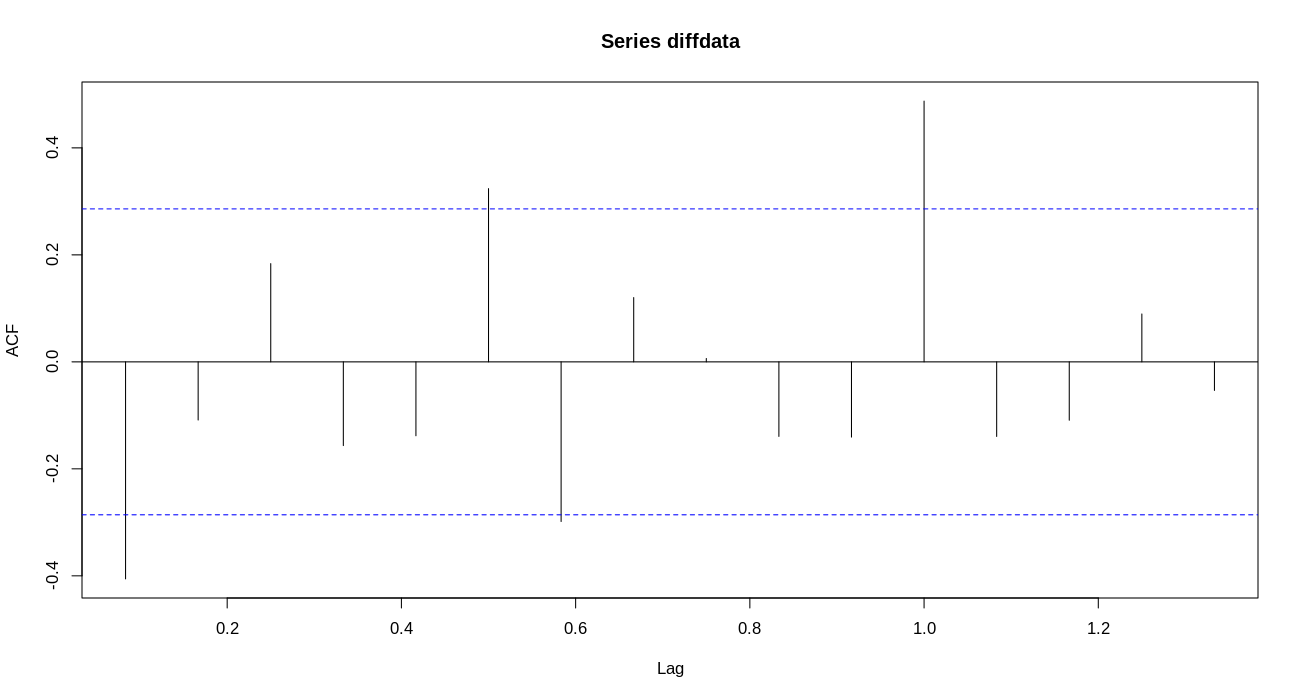

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x o o o o x o o o o o  x  o  o 
1 x o o o o o o o o o o  x  o  o 
2 o o o o o o o o o o o  x  o  o 
3 o o x o o o o o o o o  x  o  o 
4 x o x o o o o o o o o  x  o  o 
5 x x x o o o o o o o o  x  o  o 
6 x x o o o o o o o o o  x  o  o 
7 o x o o o o o o o o o  x  o  o 


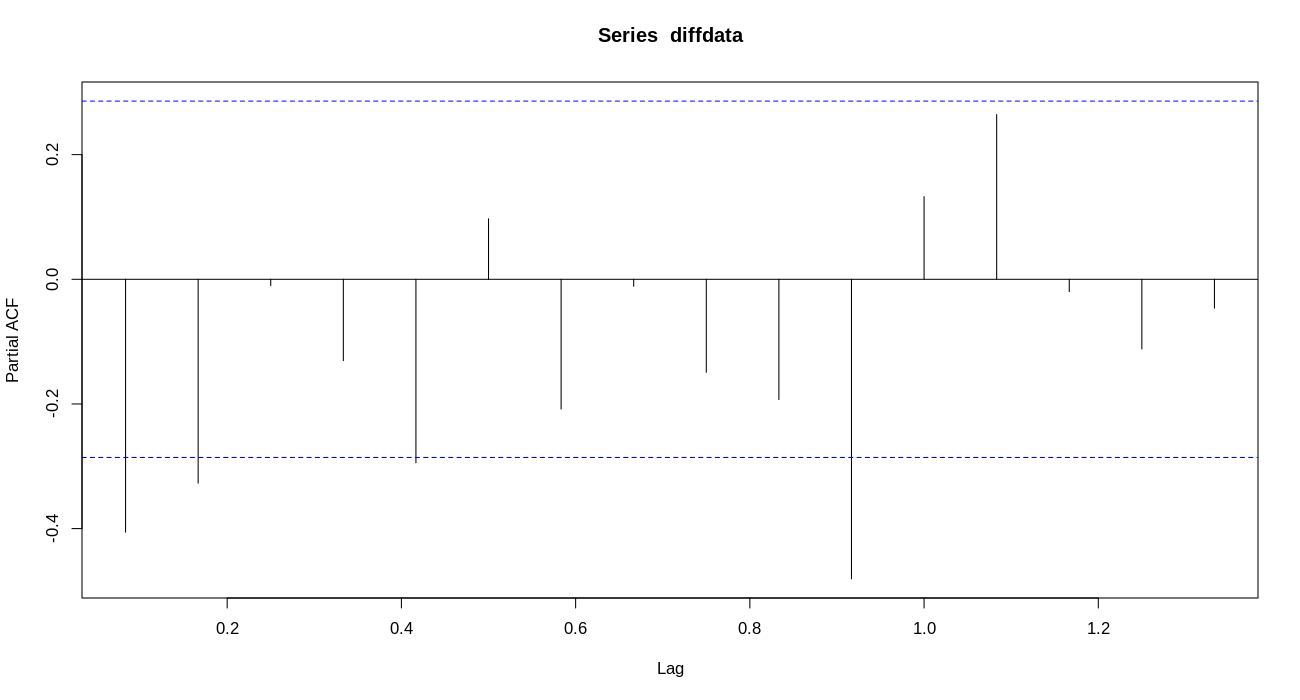

In [ ]:
#Cari order AR/MA/ARMA
tsdisplay(diffdata)
acf(diffdata)
pacf(diffdata)
eacf(diffdata)

Dari hasil EACF, diambil tiga kandidat model:

IMA(1,1)
ARIMA(1,1,1)
ARI(2,1)

In [ ]:
#Fit model
model1 <- Arima(datats,order=c(0,1,1),include.constant = TRUE)
model2 <- Arima(datats,order=c(1,1,1),include.constant = TRUE)
model3 <- Arima(datats,order=c(2,1,0),include.constant = TRUE)
cbind(model1,model2,model3)

model1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
coef      -0.9999995, 888.2999427                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
sigma2    490128253                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
var.coef  5.548548e-03, 1.067563e-04, 1.067563e-04, 5.097507e+04                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
mask      TRUE, TRUE                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
loglik    -537.843                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
aic       1081.686                                                                                

Pemilihan model terbaik dilihat dari nilai AIC dan BIC. Dapat dilihat nilai AIC terkecil adalah model ARIMA(1,1,1) sementara BIC terkecil adalah model IMA(1,1). Sehingga untuk saat ini model terbaik yang dipilih adalah model ARIMA(1,1,1)

In [ ]:
#Model terbaik: ARIMA(1,1,1)
fit <- Arima(datats,order=c(1,1,1),include.constant = TRUE)
fit

Series: datats 
ARIMA(1,1,1) with drift 

Coefficients:
         ar1     ma1     drift
      0.2391  -1.000  910.3310
s.e.  0.1445   0.063  284.6572

sigma^2 = 478138948:  log likelihood = -536.5
AIC=1080.99   AICc=1081.94   BIC=1088.39

# Diagnostic Checking

**Uji Stasioneritas Residual**

$H_0$: Data stasioner

In [ ]:
#Uji stasioneritas residual
adf.test(fit$residuals)


	Augmented Dickey-Fuller Test

data:  fit$residuals
Dickey-Fuller = -3.1672, Lag order = 3, p-value = 0.108
alternative hypothesis: stationary


Karena p-value > 0.05, maka $H_0$ tidak ditolak.


**Uji Independensi (Ljung Box)**

$H_0$: Residual independen


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1) with drift
Q* = 11.332, df = 7, p-value = 0.1248

Model df: 3.   Total lags used: 10



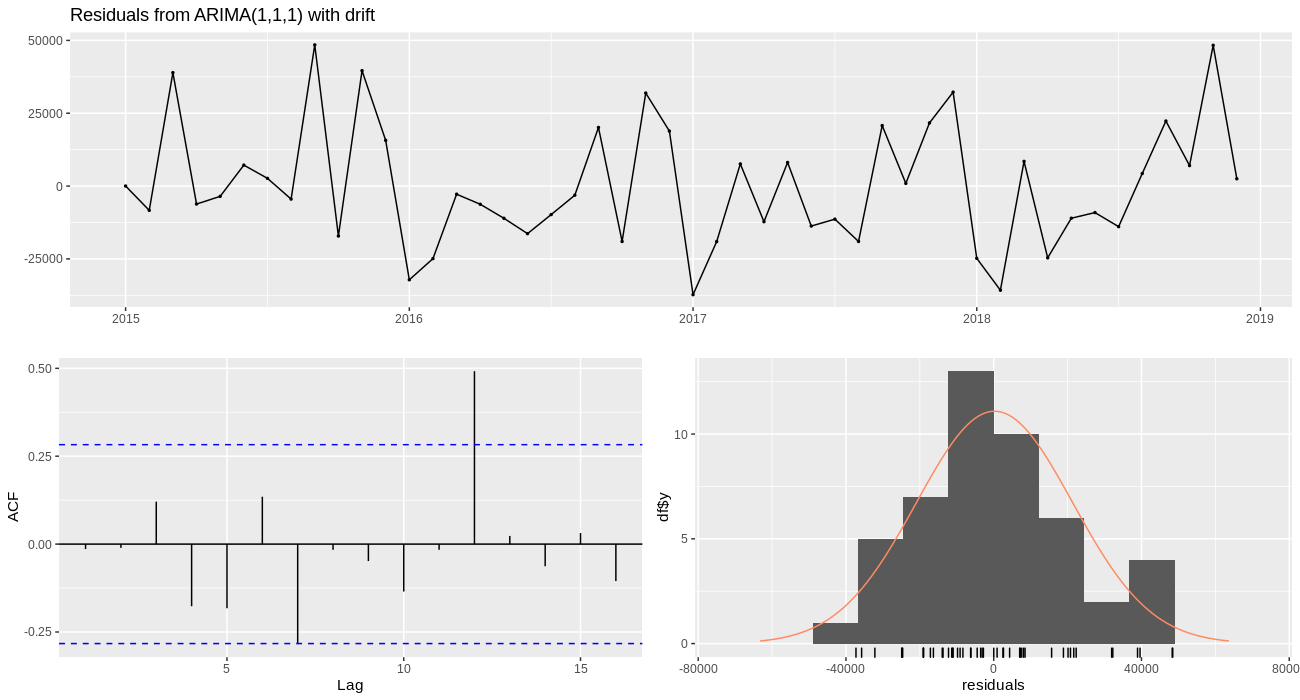

In [ ]:
#Uji independensi
checkresiduals(fit)

Karena p-value > 0.05, maka $H_0$ tidak ditolak.


**Uji Normalitas (Jarque Bera)**

$H_0$: Data normal

In [ ]:
#Uji Normalitas
jb.norm.test(fit$residuals)


	Jarque-Bera test for normality

data:  fit$residuals
JB = 2.3387, p-value = 0.1605


Karena p-value > 0.05, maka $H_0$ tidak ditolak.

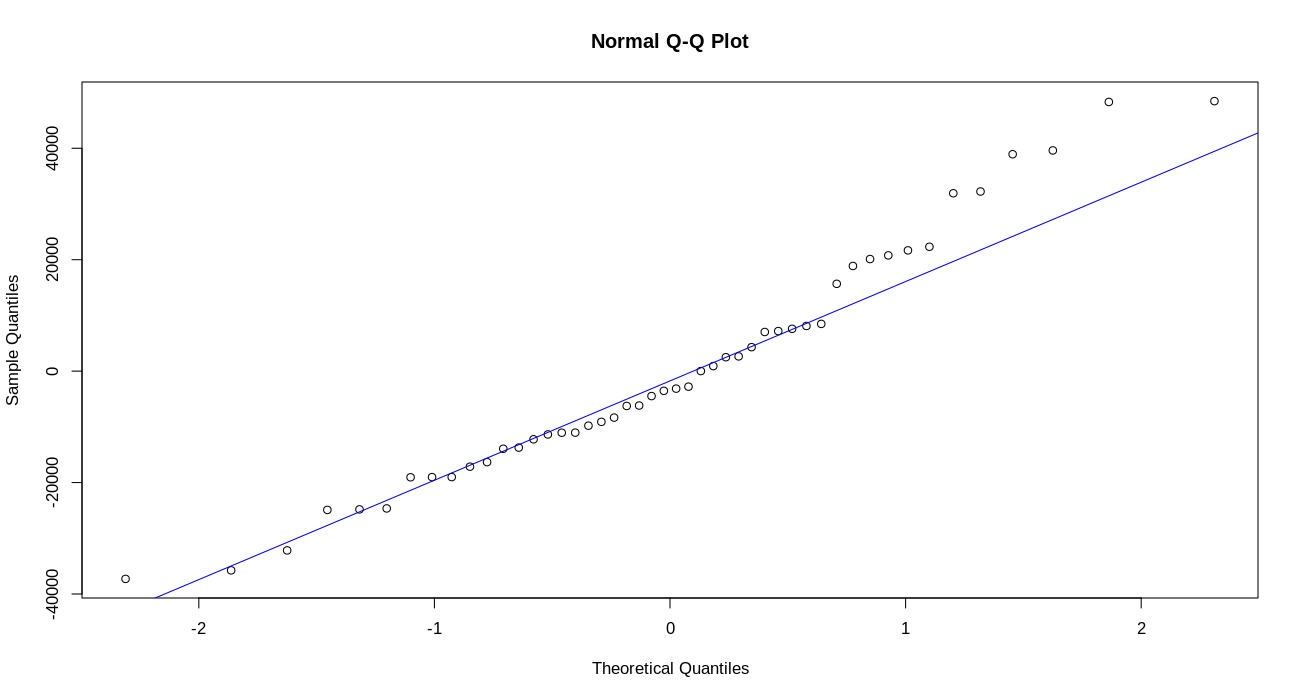

In [ ]:
#Plot Uji Normalitas
qqnorm(fit$residuals)
qqline(fit$residuals, col = 'blue')

# Overfitting
*ARIMA(1,1,1)*

Overfit 1: ARIMA(2,1,1)

Overfit 2: ARIMA(1,1,2)

In [ ]:
#Overfitting
Overfit1 <- Arima(datats,order=c(2,1,1),include.constant = TRUE)
Overfit2<- Arima(datats,order=c(1,1,2),include.constant = TRUE)
cbind(fit,Overfit1,Overfit2)

fit                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
coef      0.2390556, -0.9999794, 910.3310249                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
sigma2    478138948                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
var.coef  2.088655e-02, -5.547358e-07, 2.464301e+00, -5.547358e-07, 3.971930e-03, 1.733901e-03, 2.464301e+00, 1.733901e-03, 8.102972e+04                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
mask      TRUE, TRUE, TRUE                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
loglik    -536.4951                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
aic       1080

Dapat dilihat bahwa nilai AIC dan BIC dari ARIMA(1,1,1) masih lebih baik dibandingkan ARIMA(1,1,2) dan ARIMA (2,1,1)

**Uji t**

$H_0$: Parameter ($Φ$) = 0

In [ ]:
#Overfit 1 : AR2
uji1 <-Overfit1$coef[['ar2']]/0.2521
daerah_kritis1 <- qt(0.025,(length(datats)-1))
daerah_kritis1; uji1

#P value
2*(pt(uji1,(length(datats)-1)))

[1] -2.011741

[1] -1.446028

[1] 0.1548053

Karena nilai statistik uji termasuk di daerah kritis, maka $H_0$ diterima sehingga dapat disimpulkan bahwa parameter AR2 = 0 (tidak signifikan).

In [ ]:
#Overfit 1 : MA2
uji2 <-Overfit2$coef[['ma2']]/0.6465
daerah_kritis2 <- qt(0.025,(length(datats)-1))
daerah_kritis2; uji2

#P value
2*(pt(uji2,(length(datats)-1)))

[1] -2.011741

[1] -0.6068816

[1] 0.5468501

Karena nilai statistik uji termasuk di daerah kritis, maka $H_0$ diterima sehingga dapat disimpulkan bahwa parameter MA2 = 0 (tidak signifikan).

**Model Terbaik** = ARIMA(1,1,1)

In [ ]:
train <- window(datats, end=c(2018,0))
train

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2015,14205.707,4519.892,55205.797,27906.855,23644.303,34322.936,33781.543,27117.536,81623.527,31453.393,77907.661,68167.058
2016,18066.958,11951.411,32339.318,34154.469,29959.531,23599.374,28608.259,36818.342,63133.606,31011.737,75249.399,74543.601
2017,18542.491,22978.815,51165.059,38679.767,56656.908,39724.486,38320.783,30542.200,69193.391,59583.033,79066.496,95739.121


In [ ]:
test <- window(datats, start=c(2018,1))
test

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2018,43476.47,19921.00,58863.41,35541.91,43825.98,48190.73,44825.10,62837.85,86152.89,77448.13,117938.15,83030.39


In [ ]:
train_fit <- Arima(train,order=c(1,1,1),include.constant = TRUE)
forecast_train <- forecast(train_fit,12)
train
forecast_train

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2015,14205.707,4519.892,55205.797,27906.855,23644.303,34322.936,33781.543,27117.536,81623.527,31453.393,77907.661,68167.058
2016,18066.958,11951.411,32339.318,34154.469,29959.531,23599.374,28608.259,36818.342,63133.606,31011.737,75249.399,74543.601
2017,18542.491,22978.815,51165.059,38679.767,56656.908,39724.486,38320.783,30542.200,69193.391,59583.033,79066.496,95739.121


         Point Forecast    Lo 80     Hi 80    Lo 95    Hi 95
Jan 2018       67412.40 39231.87  95592.92 24314.00 110510.8
Feb 2018       62959.27 34164.20  91754.34 18921.02 106997.5
Mar 2018       62921.96 34080.94  91762.98 18813.42 107030.5
Apr 2018       63701.43 34854.18  92548.68 19583.37 107819.5
May 2018       64631.98 35783.66  93480.30 20512.28 108751.7
Jun 2018       65590.47 36741.95  94438.98 21470.47 109710.5
Jul 2018       66554.12 37705.57  95402.68 22434.07 110674.2
Aug 2018       67518.74 38670.18  96367.30 23398.67 111638.8
Sep 2018       68483.53 39634.97  97332.09 24363.46 112603.6
Oct 2018       69448.36 40599.79  98296.92 25328.28 113568.4
Nov 2018       70413.19 41564.62  99261.75 26293.11 114533.3
Dec 2018       71378.02 42529.45 100226.58 27257.94 115498.1

In [ ]:
cbind(test,forecast_train)

,test,forecast_train.Point Forecast,forecast_train.Lo 80,forecast_train.Hi 80,forecast_train.Lo 95,forecast_train.Hi 95
Jan 2018,43476.47,67412.40,39231.87,95592.92,24314.00,110510.8
Feb 2018,19921.00,62959.27,34164.20,91754.34,18921.02,106997.5
Mar 2018,58863.41,62921.96,34080.94,91762.98,18813.42,107030.5
Apr 2018,35541.91,63701.43,34854.18,92548.68,19583.37,107819.5
May 2018,43825.98,64631.98,35783.66,93480.30,20512.28,108751.7
Jun 2018,48190.73,65590.47,36741.95,94438.98,21470.47,109710.5
Jul 2018,44825.10,66554.12,37705.57,95402.68,22434.07,110674.2
Aug 2018,62837.85,67518.74,38670.18,96367.30,23398.67,111638.8
Sep 2018,86152.89,68483.53,39634.97,97332.09,24363.46,112603.6
Oct 2018,77448.13,69448.36,40599.79,98296.92,25328.28,113568.4


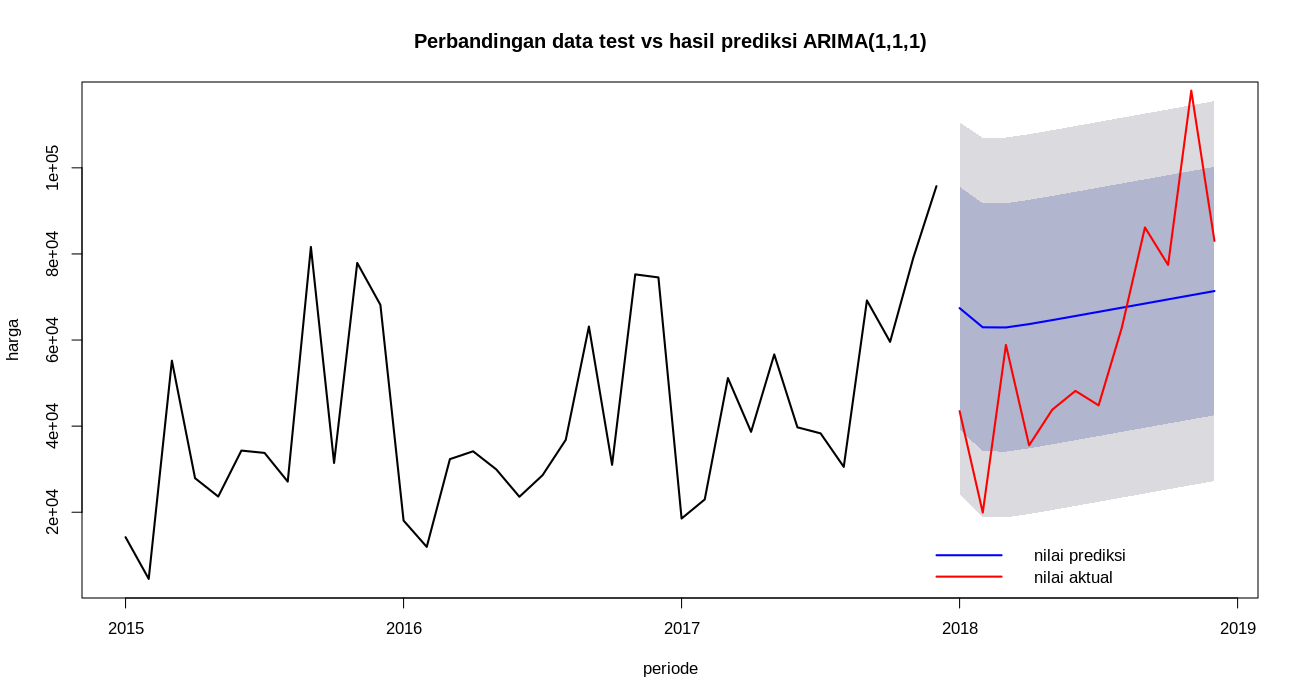

In [ ]:
plot(forecast_train,
     fcol="blue",lwd=2,
     main = 'Perbandingan data test vs hasil prediksi ARIMA(1,1,1)',
     xlab = 'periode',
     ylab = 'harga')
lines(test,
      col = 'red',
      lwd = 2)
legend('bottomright',
       col=c('blue','red'),
       legend = c('nilai prediksi','nilai aktual'),
       lwd=2,
       bty='n')

In [ ]:
mean(abs(test-forecast_train$mean))

[1] 20721.2

In [ ]:
#Forecast final (data baru)
fit #pake semua data
forecast_final <- forecast(fit,h=6)
forecast_final

Series: datats 
ARIMA(1,1,1) with drift 

Coefficients:
         ar1     ma1     drift
      0.2391  -1.000  910.3310
s.e.  0.1445   0.063  284.6572

sigma^2 = 478138948:  log likelihood = -536.5
AIC=1080.99   AICc=1081.94   BIC=1088.39

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2019       72904.86 44595.58 101214.1 29609.55 116200.2
Feb 2019       71177.01 41937.74 100416.3 26459.40 115894.6
Mar 2019       71456.67 42133.65 100779.7 26610.99 116302.3
Apr 2019       72216.23 42880.92 101551.5 27351.74 117080.7
May 2019       73090.52 43752.71 102428.3 28222.21 117958.8
Jun 2019       73992.24 44653.85 103330.6 29123.05 118861.4

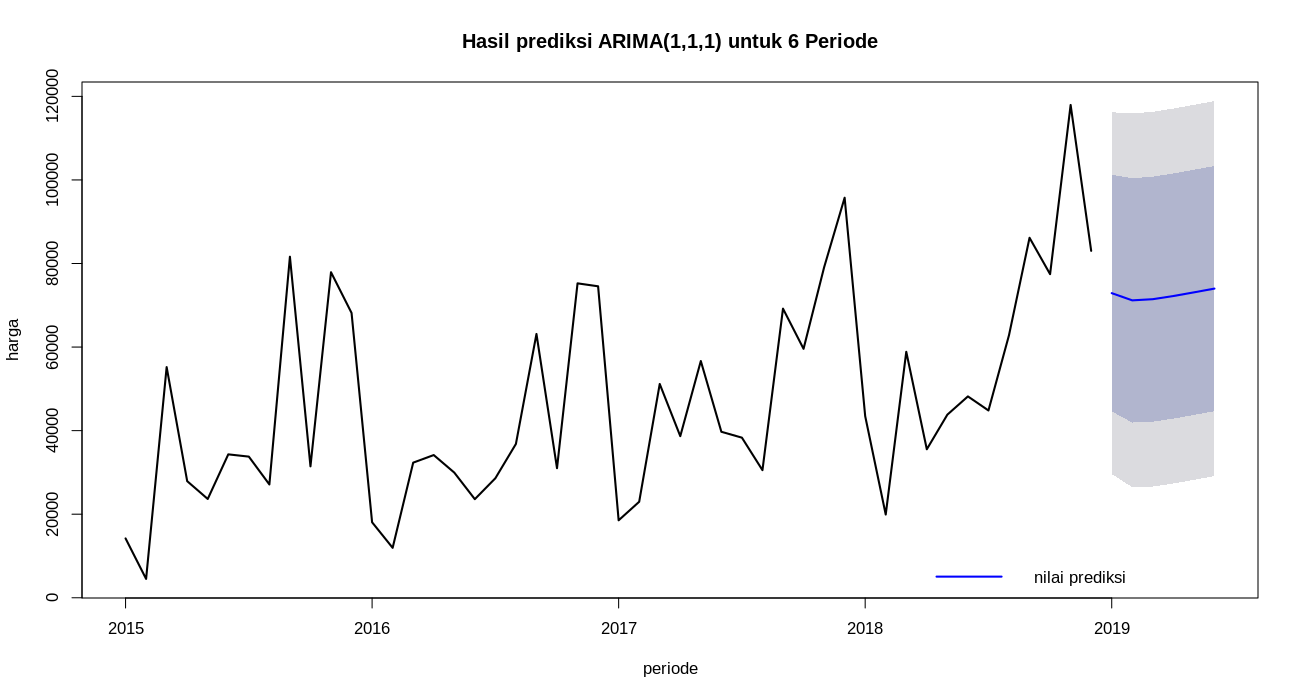

In [ ]:
plot(forecast_final,
     fcol="blue",lwd=2,
     main = 'Hasil prediksi ARIMA(1,1,1) untuk 6 Periode',
     xlab = 'periode',
     ylab = 'harga')
legend('bottomright',
       col=c('blue'),
       legend = c('nilai prediksi'),
       lwd=2,
       bty='n')